# Learning Analysis

The purpose of this notebook is to document results from training

## Preamble

In [1]:
import pandas as pd
import dill
from collections import Counter
from matplotlib import pyplot as plt
import dill
import torch

### Helper Functions

In [128]:
def calc_win_percentage(winner_list, creatures):
    total_games_played = len(winner_list)
    counts = Counter(winner_list)
    win_percentages = {creature: num_wins/total_games_played for creature, num_wins in counts.items()}
    for creature in creatures:
        if creature not in win_percentages.keys():
            win_percentages[creature] = 0
    return win_percentages

def report_actions(state):
    state_def = [
        "left",
        "right",
        "up",
        "down",
        "end",
        "shoot",
        "slash",
    ]

    actions = leotris.player.strategy.policy_net(state).tolist()[0]
    actions = list(zip(state_def, actions))
    for an, a in actions:
        print("{}: \t{}".format(an, round(a, 2)))
    print(leotris.actions[int(torch.argmax(leotris.player.strategy.policy_net(state)))].name)

### Load Data

## Method Analysis

### Random

Number of games played: 37700


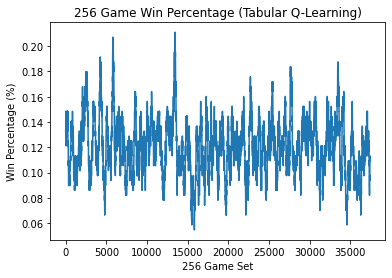

{'Strahd': 0.8797347480106101, 'Leotris': 0.12026525198938992}

In [3]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_random.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) -
               batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### Ranged Aggression

Number of games played: 12000


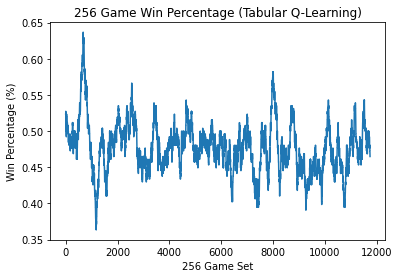

{'Strahd': 0.5225, 'Leotris': 0.4775}

In [4]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_ranged_aggression.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### Tabular Q-Learning

Number of games played: 7100


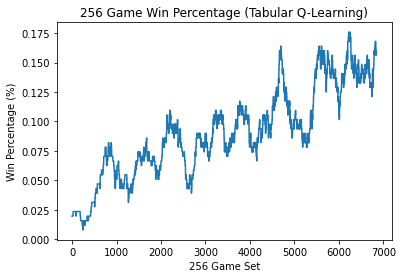

{'Strahd': 0.9094366197183099, 'Leotris': 0.09056338028169014}

In [5]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_q_tabular.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

## Linear Function Approximation

Number of games played: 67600


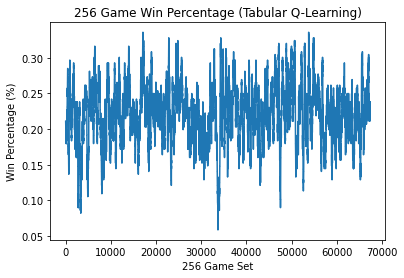

{'Leotris': 0.22146449704142013, 'Strahd': 0.7785355029585799}

In [6]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_linear_function_approximation.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### DQN

Number of games played: 1600


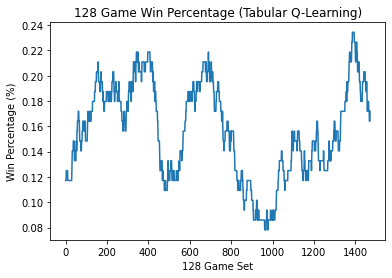

{'Strahd': 0.845625, 'Leotris': 0.154375}

In [23]:
batch_size = 128
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_DQN.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### Double DQN:

Number of games played: 800


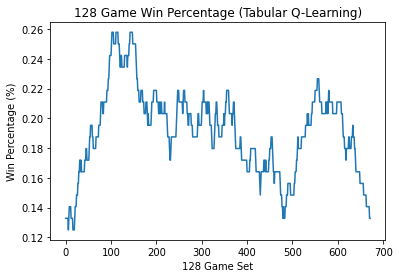

{'Strahd': 0.82, 'Leotris': 0.18}

In [353]:
batch_size = 128
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_double_DQN.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

## Scratch

In [347]:
leotris = dill.load(open("results/model_double_DQN_3.pickle", "rb"))
params = list(leotris.player.strategy.policy_net.parameters())

for param in params:
    print(param.data.numpy().max())
print("----")
for param in params:
    print(param.data.numpy().min())

0.5983245
0.42889723
0.49241638
0.441437
0.75966847
0.6704619
----
-0.44471607
-0.22864896
-0.5933507
-0.08575925
-0.39735854
-0.31936383


In [350]:
leotris = dill.load(open("results/model_double_DQN_3.pickle", "rb"))

state = torch.tensor([[
    1.00, # hit points
    0.01, # enemy hit points
    0.7, # x pos
    1.0, # y pos
    0.2, # enemy x
    0.7, # enemy y
    0.0, # attacks used
    0.0, # movement remaining
    1.0, # number steps
]])

report_actions(state)

left: 	1.54
right: 	1.65
up: 	1.53
down: 	1.69
end: 	1.25
shoot: 	2.84
slash: 	1.69
Arrow Shot


In [351]:
params[-1]

Parameter containing:
tensor([ 0.2939,  0.2848,  0.6614,  0.1406, -0.3194,  0.6705,  0.4603],
       requires_grad=True)